In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Simulation

In [2]:
coin = make_array('heads', 'tails')

In [3]:
np.random.choice(coin)

'tails'

In [4]:
np.random.choice(coin, 10)

array(['tails', 'heads', 'tails', 'heads', 'tails', 'tails', 'heads',
       'heads', 'tails', 'tails'],
      dtype='<U5')

In [5]:
np.random.choice(coin, 10) == 'heads'

array([False,  True, False,  True,  True, False, False, False, False,  True], dtype=bool)

In [6]:
sum(np.random.choice(coin, 10) == 'heads')

4

In [7]:
# Simulate one outcome

def heads_in_100_tosses():
    return sum(np.random.choice(coin, 100) == 'heads')

In [8]:
# Decide how many times you want to repeat the experiment

num_simulations = 10000

In [9]:
# Example of appending to an array 
outcomes = make_array()
outcomes = np.append(outcomes, heads_in_100_tosses())
outcomes = np.append(outcomes, heads_in_100_tosses())
outcomes

array([ 48.,  43.])

In [10]:
# Simulate that many outcomes

# Toss coin 100 times, count number of heads 
# Repeat this 10000 times, keeping track of number of heads each time 

outcomes = make_array()

for i in np.arange(num_simulations):
    # print(i)
    outcomes = np.append(outcomes, heads_in_100_tosses())
    
outcomes

array([ 56.,  64.,  49., ...,  47.,  51.,  54.])

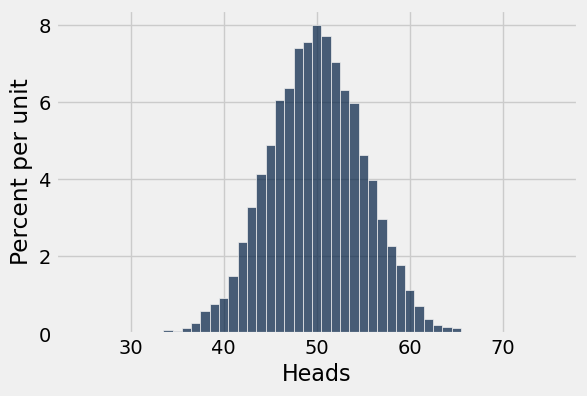

In [11]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(24.5, 76.5))

<br><br><br><br>

---

<center> return to slides </center>

---

<br><br>

# Chance #

### Probability Question

In [ ]:
# possible outcomes 
#  draw A, then K  -> AK 
AK AQ KA KQ QA [QK]

# Q: Are these all equally likely?  
# A: Yes 

In [ ]:
# our event is: Q first, K second 
#  one outcome matches this event 
#  six total outcomes
1 / 6

In [ ]:
# Multiplication Rule 
# First draw: three outcomes 
A K [Q] 
# Chance of queen first is 
1 / 3 

In [ ]:
# Now two cards left 
A [K]  
# Chance of K second, given we already took out Q 
1 / 2 

In [ ]:
# Use multiplication rule 
# P(A) * P(B | A) 
# P(Q first) * P(K second, given Q first)
1/3 * 1/2

### Another Question

In [ ]:
# Draw two cards from three {A, K, Q} 
# What is chance that one of the cards is I draw is K and other Q?

# Could use approach from above, equally likely outcomes, and ignore order: 
AK AQ KA [KQ] QA [QK]

In [ ]:
2 / 6

In [ ]:
# Use multiplication rule 
#  Prob of QK 
1/3 * 1/2 = 1/6 
#  Prob of KQ 
1/3 * 1/2 = 1/6 

# Then add results (events are distinct) 

### Complement Rule

### The Monty Hall Problem ###

In [ ]:
doors = make_array('car', 'first goat', 'second goat')
doors

In [ ]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [ ]:
goats = [other_goat('first goat'), other_goat('second goat')]

In [ ]:
def monty_hall():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_choice = 'car'
    
    if contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_choice = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_choice]

In [ ]:
monty_hall()

In [ ]:
results = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    results.append(monty_hall())


In [ ]:
results.show(3)

In [ ]:
results.group('Remaining').barh('Remaining')

In [ ]:
results.group('Guess').barh('Guess')